In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black
import calpred
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import statsmodels.api as sm
import os
import subprocess
import matplotlib

We simulate different disease architecture

In [2]:
def format_df(prs, y):
    df = {"PGS": [], "E": [], "y": []}
    for i in range(2):
        df["PGS"].extend(prs[:, i])
        df["E"].extend([i] * len(prs))
        df["y"].extend(y[:, i])
    df = pd.DataFrame(df)
    df["PGSxE"] = df["PGS"] * df["E"]

    fit = calpred.fit(y=df["y"], x=df[["PGS", "PGSxE"]], z=df[["E"]])
    # mean_coef, mean_se, sd_coef, sd_se = fit.mean_coef, fit.mean_se, fit.sd_coef, fit.sd_se
    df["predmean"], df["predsd"] = calpred.predict(
        x=df[["PGS", "PGSxE"]], z=df[["E"]], model_fit=fit
    )
    return df


def plot_df(df, figsize=(5, 2.8), out_prefix=None):

    fig, axes = plt.subplots(
        figsize=figsize, dpi=150, ncols=2, sharex=True, sharey=True
    )
    for i in range(2):
        sub_df = df[df["E"] == i]
        ax = axes[i]
        calpred.plot_scatter_calibration(
            x=sub_df["PGS"], y=sub_df["y"], ax=ax, downsample=0.2
        )
        ax.set_xlabel("PGS")
        ax.set_title(f"Context={i + 1}")
        ax.legend(loc="upper left", fontsize=7)
        ax.set_ylim(-4, 4)

    axes[0].set_ylabel("Phenotype")
    fig.tight_layout()
    fig.suptitle("Before calibration", y=1.04, x=0.54, fontsize=14)

    if out_prefix:
        fig.savefig(out_prefix + ".pgs.png", bbox_inches="tight")

    fig, axes = plt.subplots(
        figsize=figsize, dpi=150, ncols=2, sharex=True, sharey=True
    )
    for i in range(2):
        sub_df = df[df["E"] == i].reset_index(drop=True)
        ax = axes[i]
        calpred.plot_scatter_calibration(
            x=sub_df["predmean"], y=sub_df["y"], ax=ax, downsample=0.2
        )
        ax.set_xlabel("Calibrated PGS")
        ax.set_title(f"Context={i + 1}")

        idx = sub_df.sort_values("PGS").index[int(len(sub_df) * 0.95)]
        x, ysd = sub_df["predmean"].values[idx], sub_df["predsd"].values[idx]
        coverage = np.mean(
            (sub_df["y"] - sub_df["predmean"]).abs() < sub_df["predsd"] * 1.645
        )
        ax.errorbar(
            x=[x],
            y=[x],
            yerr=ysd * 1.645,
            fmt=".",
            markersize=4,
            color="red",
            capsize=3,
            linewidth=1,
            label=f"SD={ysd:.2f}"
            # label=f"ysd={ysd:.2f} (coverage={coverage*100:.1f}%)",
        )
        ax.legend(loc="upper left", fontsize=6)
        ax.set_xlim(-2.5, 2.5)
        ax.set_ylim(-4, 4)

    axes[0].set_ylabel("Phenotype")

    fig.tight_layout()
    fig.suptitle("After calibration", y=1.04, x=0.54, fontsize=14)

    if out_prefix:
        fig.savefig(out_prefix + ".calpred.png", bbox_inches="tight")

# Scenario 1: imperfect genetic correlation

100%|████████████████████████████████████████| 10/10 [00:00<00:00, 371.38it/s]


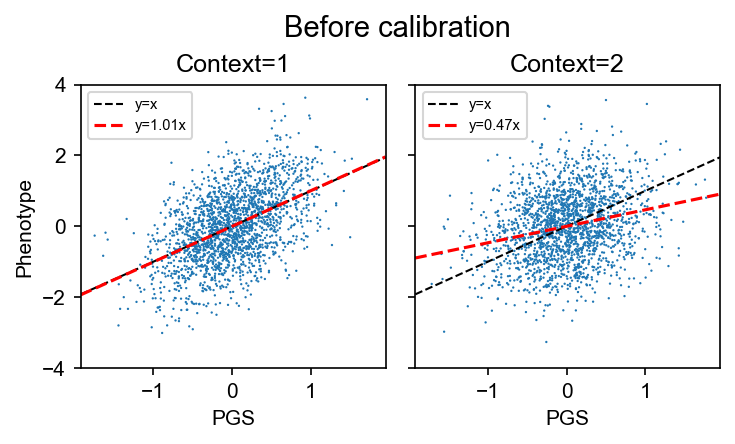

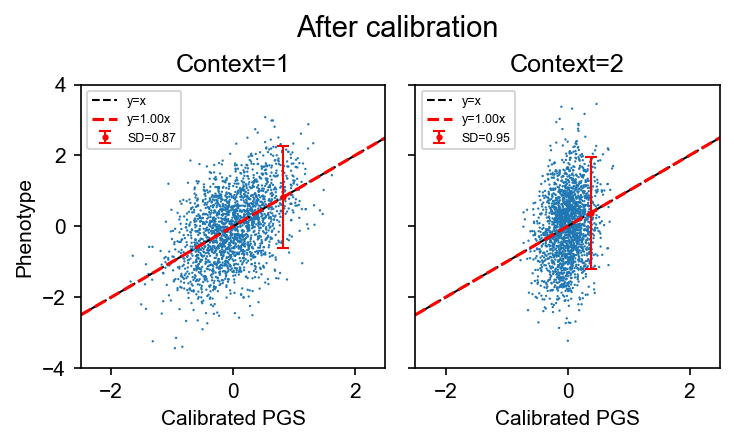

In [3]:
np.random.seed(1234)
rep = 0

ymat, prsmat, gmat, emat, betamat, betaprsmat = calpred.simulate_gxe(
    scenario=1, hsq=0.5, rg=0.5, n_rep=10
)
y, prs, g = ymat[:, :, rep], prsmat[:, :, rep], gmat[:, :, rep]
df = format_df(prs, y)
plot_df(df, out_prefix="simulate_quant_traits/scenario1")

# Scenario 2

100%|██████████████████████████████████████| 100/100 [00:00<00:00, 377.15it/s]


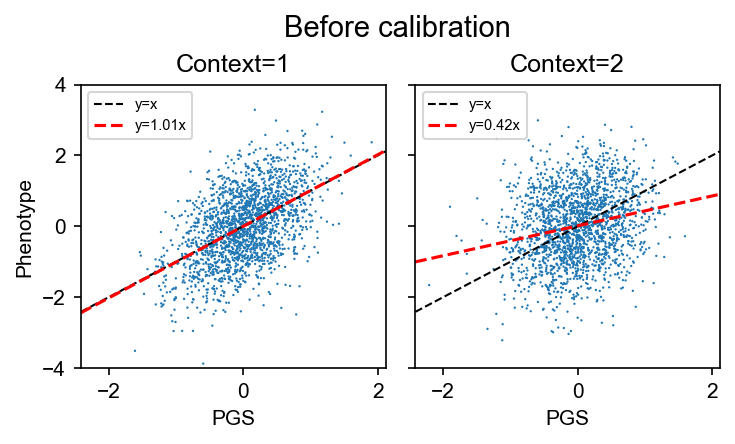

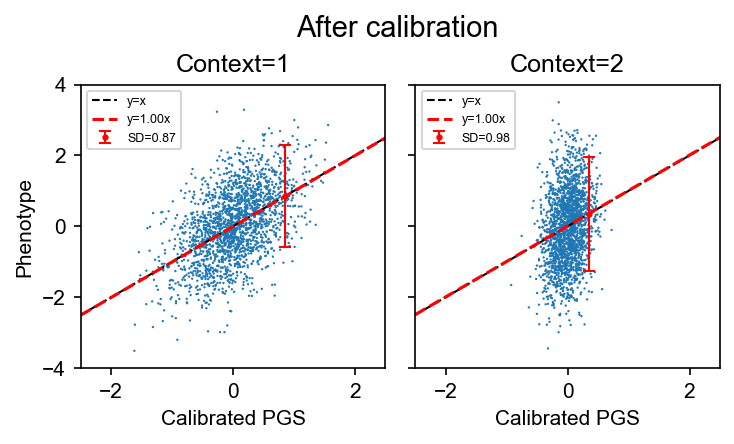

In [4]:
ymat, prsmat, gmat, emat, beta, betaprs = calpred.simulate_gxe(
    scenario=2, hsq1=0.5, hsq2=0.1
)

y, prs, g = ymat[:, :, rep], prsmat[:, :, rep], gmat[:, :, rep]

df = format_df(prs, y)
plot_df(df, out_prefix="simulate_quant_traits/scenario2")

# Scenario 3

100%|██████████████████████████████████████| 100/100 [00:00<00:00, 287.16it/s]


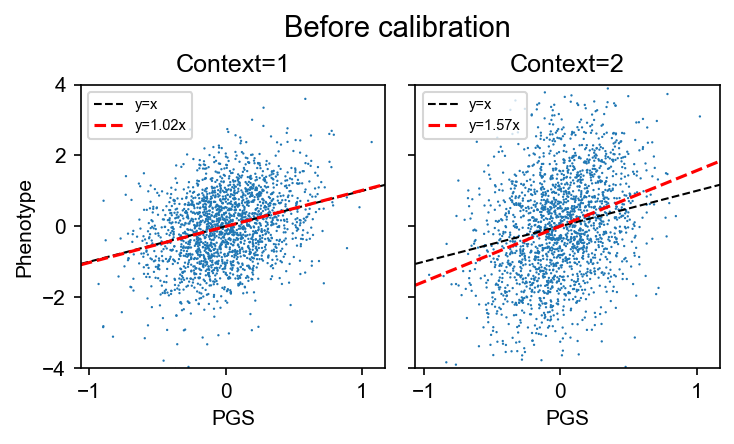

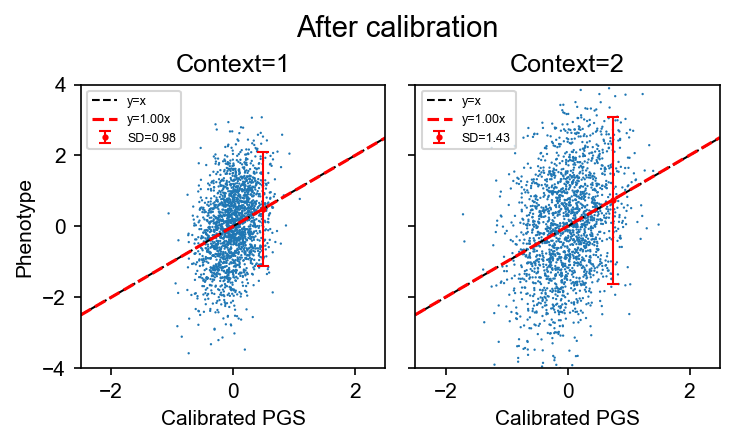

In [5]:
ymat, prsmat, gmat, emat, beta, betaprs = calpred.simulate_gxe(
    scenario=3, hsq=0.25, prop_amp=1.5
)

y, prs, g = ymat[:, :, rep], prsmat[:, :, rep], gmat[:, :, rep]

df = format_df(prs, y)
plot_df(df, out_prefix="simulate_quant_traits/scenario3")

# Main figure
1. Genetic correlation = 0.75
2. hsq1 = 0.5, hsq2 = 0.4

100%|████████████████████████████████████████| 10/10 [00:00<00:00, 525.82it/s]


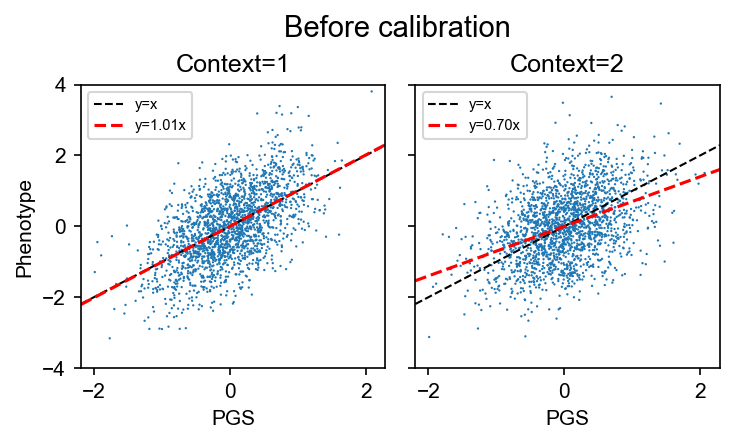

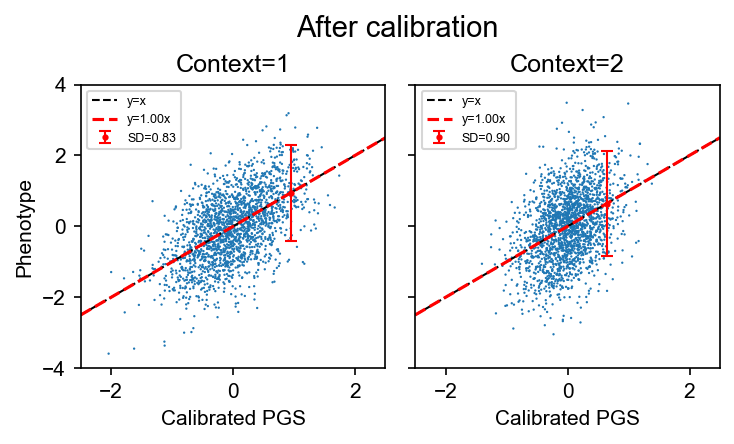

In [6]:
np.random.seed(1234)
rep = 0

ymat, prsmat, gmat, emat, betamat, betaprsmat = calpred.simulate_gxe3(
    var_g1=0.6, var_g2=0.5, var_e1=0.4, var_e2=0.5, rg=0.8, n_rep=10
)
y, prs, g = ymat[:, :, rep], prsmat[:, :, rep], gmat[:, :, rep]
df = format_df(prs, y)
plot_df(df, out_prefix="simulate_quant_traits/main")

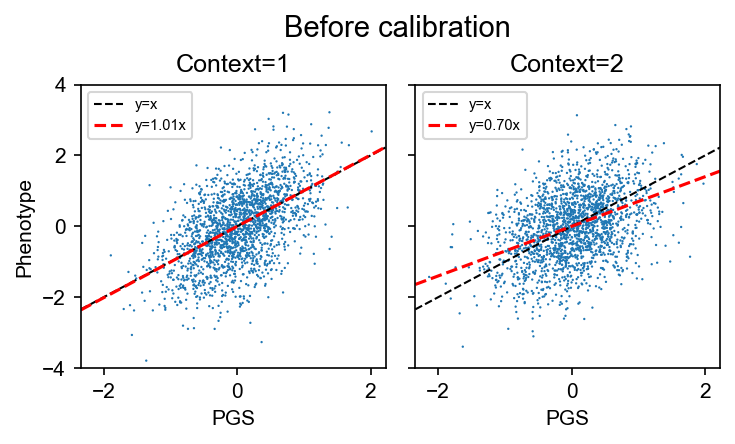

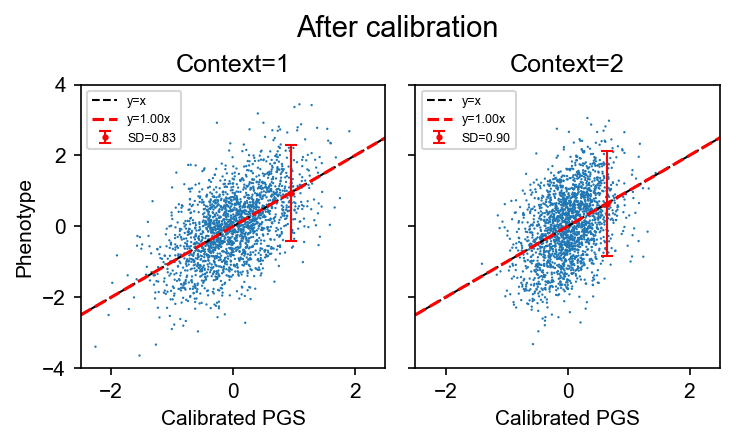

In [7]:
plot_df(df, out_prefix="simulate_quant_traits/main")